In [2]:
#dependencies
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime as dt

In [3]:
data1 = pd.read_csv('../data/train_month_1.csv',parse_dates = [29,30,32], index_col = 'client_id')
data2 = pd.read_csv('../data/train_month_2.csv',parse_dates = [29,30,32],index_col = 'client_id')
data3 = pd.read_csv('../data/train_month_3_with_target.csv',parse_dates = [29,30,32],index_col = 'client_id')

In [4]:
duplicates_all = []
for col in data1.columns:
    if data1[col].equals(data2[col]) & data2[col].equals(data3[col]):
        duplicates_all.append(col)
duplicates_all

['customer_since_all',
 'customer_since_bank',
 'customer_gender',
 'customer_birth_date',
 'customer_postal_code',
 'customer_occupation_code',
 'customer_education']

In [5]:
duplicates = ['customer_since_all',
                 'customer_since_bank',
                 'customer_gender',
                 'customer_birth_date',]
data1.drop(columns = duplicates, inplace = True)
data2.drop(columns = duplicates, inplace = True)

In [6]:
data = data1.merge(right = data2, on='client_id', suffixes = ('_2','_1')).merge(right = data3, on = 'client_id')
data.head()

,homebanking_active_2,has_homebanking_2,has_insurance_21_2,has_insurance_23_2,has_life_insurance_fixed_cap_2,has_life_insurance_decreasing_cap_2,has_fire_car_other_insurance_2,has_personal_loan_2,has_mortgage_loan_2,has_current_account_2,...,customer_since_bank,customer_gender,customer_birth_date,customer_postal_code,customer_occupation_code,customer_self_employed,customer_education,customer_children,customer_relationship,target
client_id,,,,,,,,,,,,,,,,,,,,,
910df42ad36243aa4ce16324cd7b15b0,0,0,0,0,0,0,1,0,0,1,...,1994-08-01,1,1943-09-01,3630,9.0,0,0.0,NaN,NaN,0
4e19dc3a54323c5bbfc374664b950cd1,1,1,0,0,0,0,0,0,0,1,...,2017-01-01,1,1994-02-01,2460,9.0,0,NaN,mature,couple,0
f5d08db1b86c0cb0f566bf446cff1fb4,1,1,0,0,0,0,1,0,0,1,...,1980-12-01,2,1936-10-01,2660,9.0,0,NaN,NaN,single,0
26170ecf63653e215c52f4262c1c4859,0,0,0,0,0,0,1,0,0,0,...,2013-10-01,1,1946-09-01,6600,9.0,0,NaN,NaN,NaN,0
c078009957dffb64f20e61b41220a976,0,0,0,0,0,0,0,0,0,0,...,2012-11-01,2,1996-04-01,8550,9.0,0,NaN,mature,couple,1


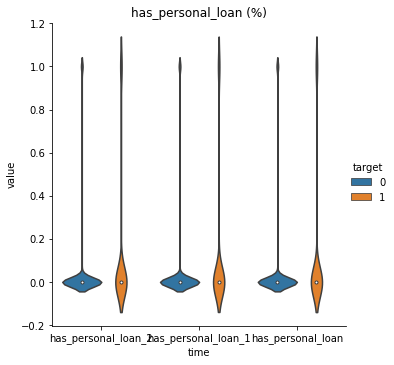

In [7]:
var = 'has_personal_loan'
df = data[[var+'_2',var+'_1',var,'target']]
df.reset_index(inplace = True)
df_melt = df.melt( id_vars = ('client_id','target'),var_name='time', value_name="value")
g = sb.catplot(data = df_melt, x = 'time', y = 'value', hue = 'target', kind = 'violin')
g.set(title = f"{var} (%)")

/var/folders/k9/8r2lz4cj6qv_gpslncglrtc40000gn/T/ipykernel_26005/2136024911.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


<Figure size 432x288 with 0 Axes>

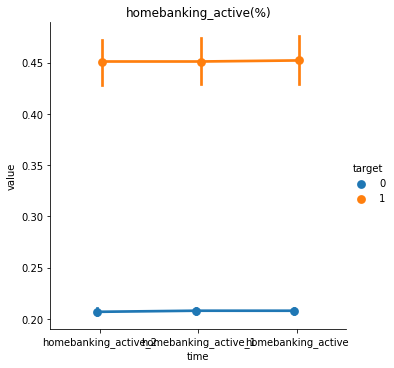

<Figure size 432x288 with 0 Axes>

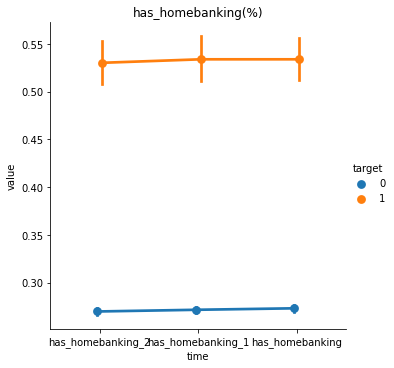

<Figure size 432x288 with 0 Axes>

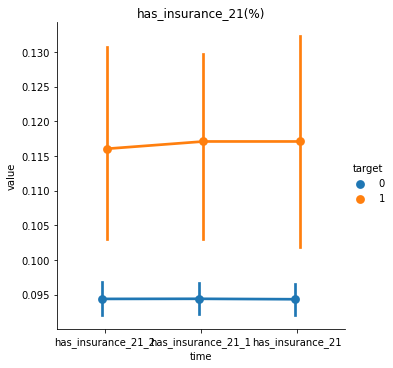

<Figure size 432x288 with 0 Axes>

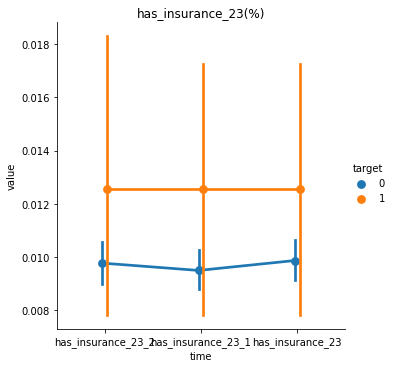

<Figure size 432x288 with 0 Axes>

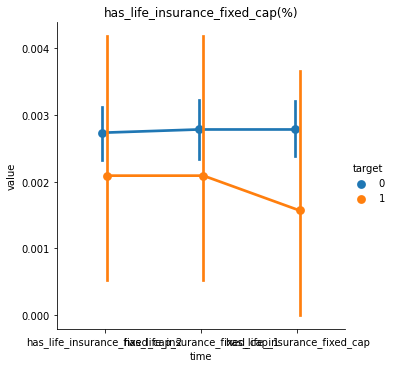

<Figure size 432x288 with 0 Axes>

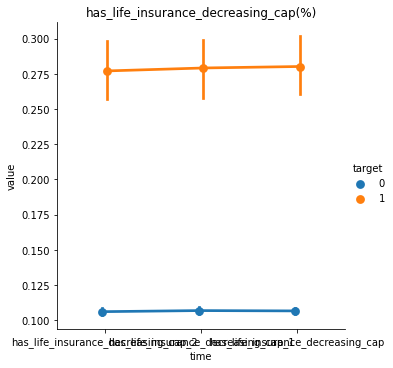

<Figure size 432x288 with 0 Axes>

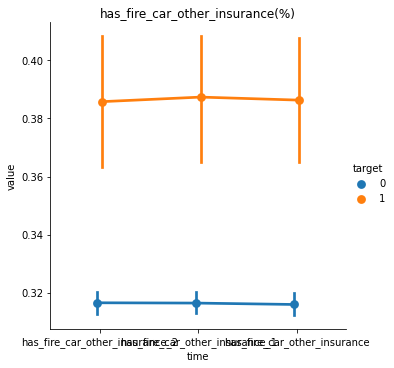

<Figure size 432x288 with 0 Axes>

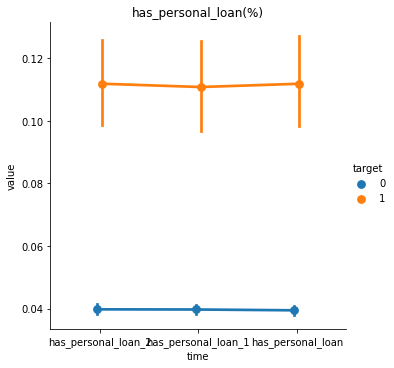

<Figure size 432x288 with 0 Axes>

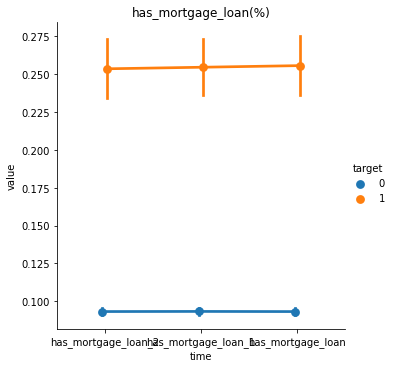

<Figure size 432x288 with 0 Axes>

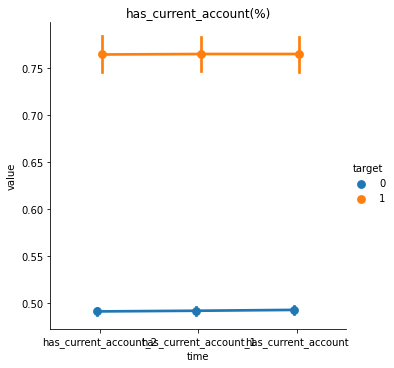

<Figure size 432x288 with 0 Axes>

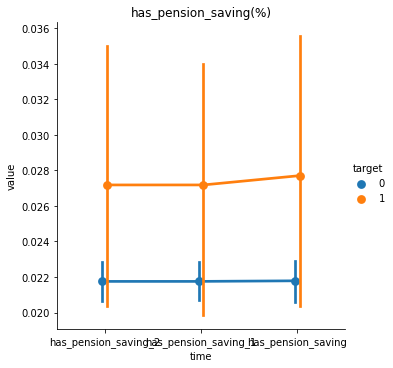

<Figure size 432x288 with 0 Axes>

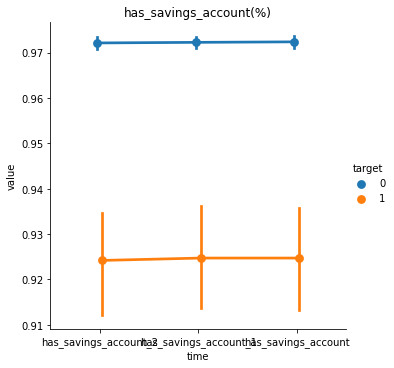

<Figure size 432x288 with 0 Axes>

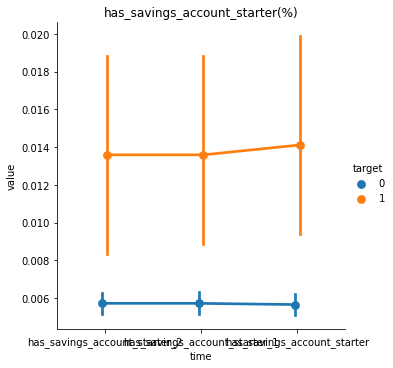

<Figure size 432x288 with 0 Axes>

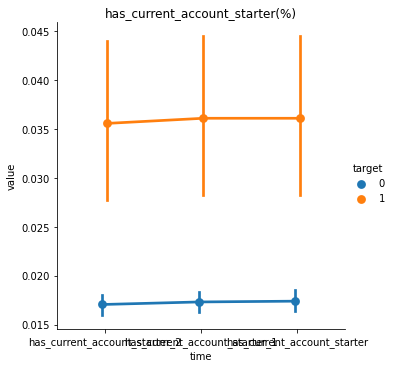

In [11]:
cols_binary = ['homebanking_active', 'has_homebanking',
       'has_insurance_21', 'has_insurance_23', 'has_life_insurance_fixed_cap',
       'has_life_insurance_decreasing_cap', 'has_fire_car_other_insurance',
       'has_personal_loan', 'has_mortgage_loan', 'has_current_account',
       'has_pension_saving', 'has_savings_account',
       'has_savings_account_starter', 'has_current_account_starter']

for var in cols_binary:
    if (var not in duplicates):
        plt.figure()
        df = data[[var+'_2',var+'_1',var,'target']]
        df.reset_index(inplace = True)
        df_melt = df.melt( id_vars = ('client_id','target'),var_name='time', value_name="value")
        g = sb.catplot(data = df_melt, x = 'time', y = 'value', hue = 'target', kind = 'point', dodge = True)
        g.set(title = f'{var}(%)')
    else:
        continue


/var/folders/k9/8r2lz4cj6qv_gpslncglrtc40000gn/T/ipykernel_26005/2448077011.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


<Figure size 432x288 with 0 Axes>

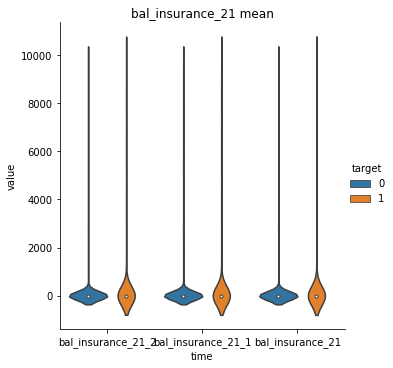

<Figure size 432x288 with 0 Axes>

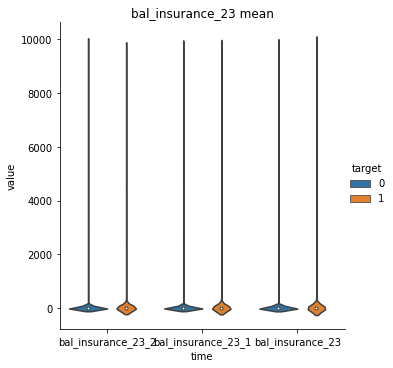

<Figure size 432x288 with 0 Axes>

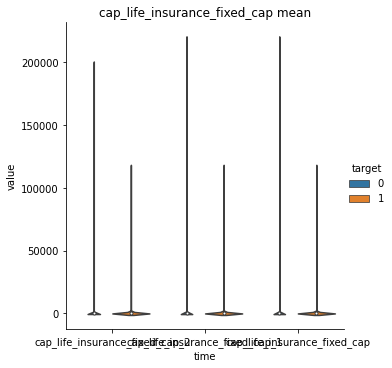

<Figure size 432x288 with 0 Axes>

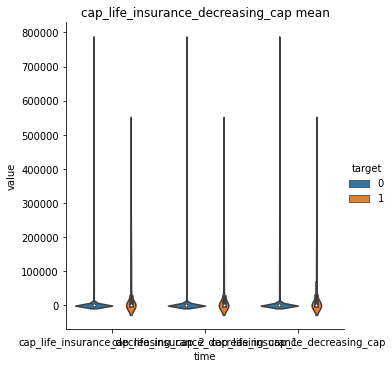

<Figure size 432x288 with 0 Axes>

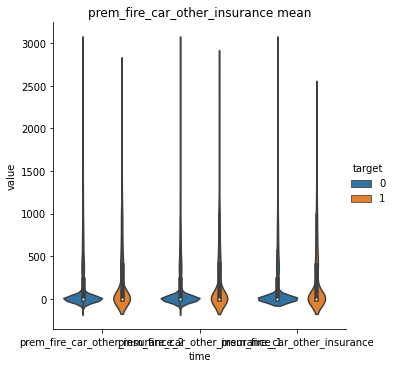

<Figure size 432x288 with 0 Axes>

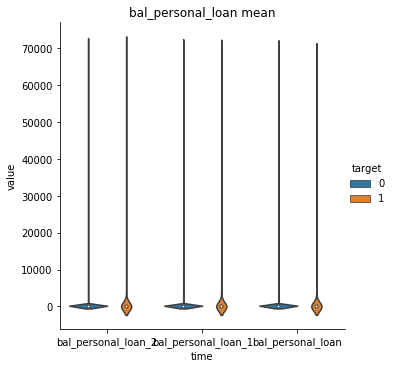

<Figure size 432x288 with 0 Axes>

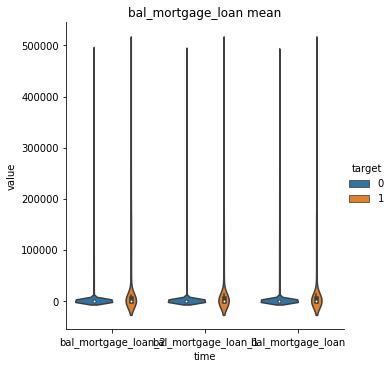

<Figure size 432x288 with 0 Axes>

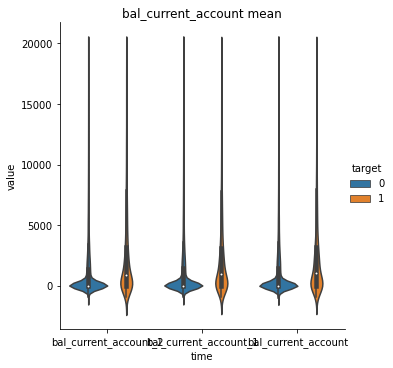

<Figure size 432x288 with 0 Axes>

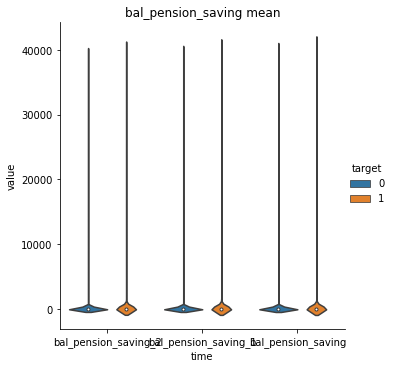

<Figure size 432x288 with 0 Axes>

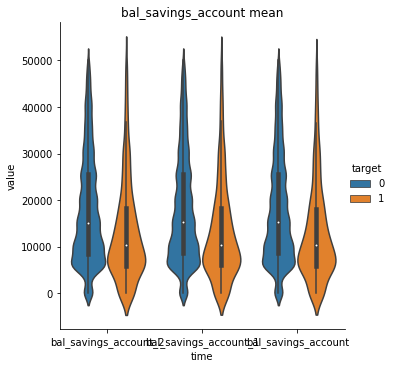

<Figure size 432x288 with 0 Axes>

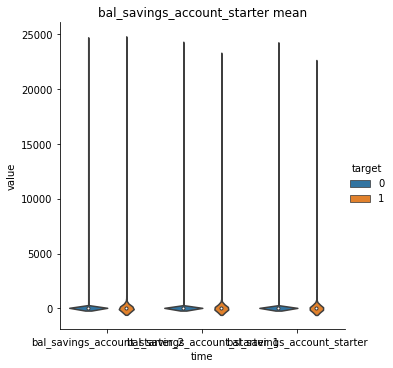

<Figure size 432x288 with 0 Axes>

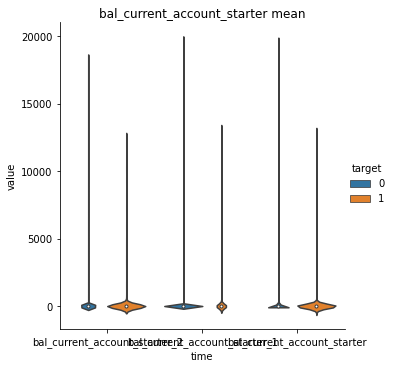

In [10]:
from numpy import median

cols_cont = ['bal_insurance_21', 'bal_insurance_23', 'cap_life_insurance_fixed_cap',
       'cap_life_insurance_decreasing_cap', 'prem_fire_car_other_insurance',
       'bal_personal_loan', 'bal_mortgage_loan', 'bal_current_account',
       'bal_pension_saving', 'bal_savings_account',
       'bal_savings_account_starter', 'bal_current_account_starter']

for var in cols_cont:
    if (var not in duplicates):
        plt.figure()
        df = data[[var+'_2',var+'_1',var,'target']]
        df.reset_index(inplace = True)
        df_melt = df.melt( id_vars = ('client_id','target'),var_name='time', value_name="value")
        g = sb.catplot(data = df_melt, x = 'time', y = 'value', hue = 'target', kind = 'violin')
        g.set(title = f'{var} mean')
    else:
        continue
        